In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd 
import cmocean
from cm_xml_to_matplotlib import make_cmap

## Absorption based Primary Productivity Storyboard (2018 data)

### Absorbed Photons = PAR x $\frac{a_{phi}}{a_{total}}$

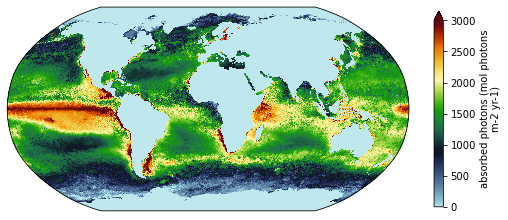

In [2]:
def aquatime(ds):
    satdate = ds.attrs['product_name'][1:8] 
    ds['time'] = pd.to_datetime(satdate, format='%Y%j')
    ds = ds.expand_dims('time').set_coords('time')
    return(ds)

# Load Monthly datasets
ap = xr.open_mfdataset('/media/gsilsbe/SILSBE/cafe/modisa/monthly/A2018*.nc', engine='netcdf4', concat_dim='time', combine='nested')['ap']

# Sum through time units (d to yr)
ap = ap *  ap.time.dt.days_in_month
ap_annual = ap.sum(dim='time')   
ap_annual.name = 'absorbed photons (mol photons m-2 yr-1)' 

ap_annual


# Plot Annual mean
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ap_annual.plot(transform=ccrs.PlateCarree(), 
            vmin=0, vmax=3e3,
            cmap=make_cmap('/home/gsilsbe/Documents/cafe/colormap/KeyColormaps/4-3wbgy.xml'),
            cbar_kwargs={'shrink': 0.6});

ax.add_feature(cfeature.LAND, zorder=0, facecolor ='dimgrey')


## Plot $\sum$PAR and average annual $\frac{a_{phi}}{a_{total}}$

/home/gsilsbe/.conda/envs/mab/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


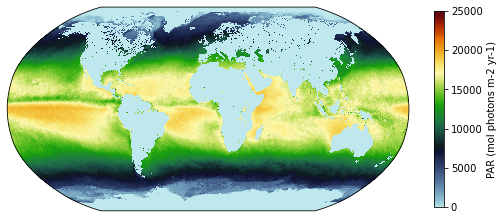

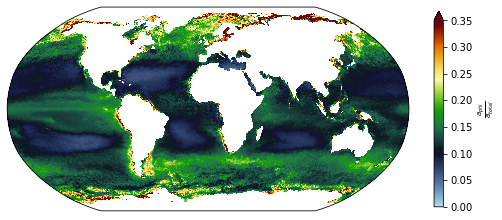

In [3]:
# Load input data for plotting
par = xr.open_mfdataset('/media/gsilsbe/SatData/MODISA/V2018/monthly/A2018*.L3m_MO_PAR_par_9km.nc', 
                         preprocess = aquatime, engine='netcdf4', concat_dim='time', combine='nested')['par']


# Sum through time units (d to yr)
par = par *  par.time.dt.days_in_month
par_annual = par.sum(dim='time')   
par_annual.name = 'PAR (mol photons m-2 yr-1)' 

#  Calculate aphi_atotal (because c model currently outputs absorbed photons)
aphi_atot = ap / par 
aphi_atot_mean = aphi_atot.mean(dim='time')  

# Plot Annual mean
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
par_annual.plot(transform=ccrs.PlateCarree(), 
            vmin=0, vmax=2.5e4,
            cmap=make_cmap('/home/gsilsbe/Documents/cafe/colormap/KeyColormaps/4-3wbgy.xml'),
            cbar_kwargs={'shrink': 0.6});

# Plot Annual mean
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
aphi_atot_mean.plot(transform=ccrs.PlateCarree(), 
            vmin=0, vmax=0.35,
            cmap=make_cmap('/home/gsilsbe/Documents/cafe/colormap/KeyColormaps/4-3wbgy.xml'),
            cbar_kwargs={'shrink': 0.6, 'label':r'$\frac{a_{phi}}{a_{total}}$'});


## A Fraction of absorbed photons are dissipated as heat or fluoresecence
## This fraction represents the photon yield of gross primary production $\phi_{GPP}$


/home/gsilsbe/.conda/envs/mab/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


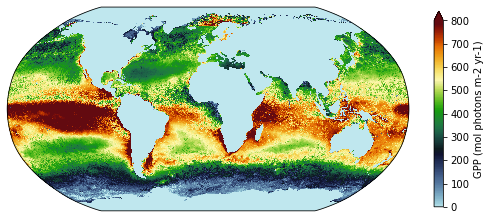

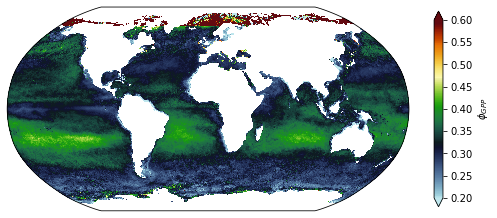

In [4]:
gpp = xr.open_mfdataset('/media/gsilsbe/SILSBE/cafe/modisa/monthly/A2018*.nc', engine='netcdf4', concat_dim='time', combine='nested')['gpp']

# Sum through time units (d to yr)
gpp = gpp *  gpp.time.dt.days_in_month
gpp_annual = gpp.sum(dim='time')   
gpp_annual.name = 'GPP (mol photons m-2 yr-1)'

gpp_yield = gpp_annual / ap_annual

# Plot Annual mean
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
gpp_annual.plot(transform=ccrs.PlateCarree(), 
            vmin=0, vmax=800,
            cmap=make_cmap('/home/gsilsbe/Documents/cafe/colormap/KeyColormaps/4-3wbgy.xml'),
            cbar_kwargs={'shrink': 0.6});

fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.tick_params(labelsize='large')
gpp_yield.plot(transform=ccrs.PlateCarree(), 
            vmin=0.2, vmax=0.6,
            cmap=make_cmap('/home/gsilsbe/Documents/cafe/colormap/KeyColormaps/4-3wbgy.xml'),
            cbar_kwargs={'shrink': 0.6, 'label':r'$\phi_{GPP}$'});

## Same parameters but only within the MLD

/home/gsilsbe/.conda/envs/mab/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


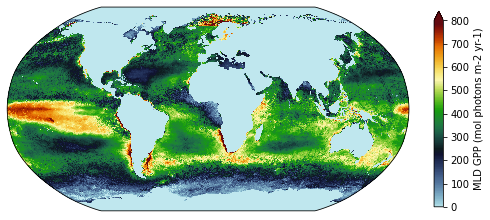

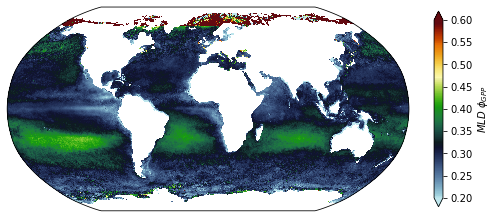

In [5]:
gpp_mld = xr.open_mfdataset('/media/gsilsbe/SILSBE/cafe/modisa/monthly/A2018*.nc', engine='netcdf4', concat_dim='time', combine='nested')['gpp_mld']
ap_mld = xr.open_mfdataset('/media/gsilsbe/SILSBE/cafe/modisa/monthly/A2018*.nc', engine='netcdf4', concat_dim='time', combine='nested')['ap_mld']

# Sum through time units (d to yr)
gpp_mld = gpp_mld *  gpp.time.dt.days_in_month
gpp_annual = gpp_mld.sum(dim='time')   
gpp_annual.name = 'MLD GPP (mol photons m-2 yr-1)'

ap_mld = ap_mld *  ap.time.dt.days_in_month
ap_annual = ap_mld.sum(dim='time')   
ap_annual.name = 'absorbed photons (mol photons m-2 yr-1)' 

# Plot Annual mean
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
gpp_annual.plot(transform=ccrs.PlateCarree(), 
            vmin=0, vmax=800,
            cmap=make_cmap('/home/gsilsbe/Documents/cafe/colormap/KeyColormaps/4-3wbgy.xml'),
            cbar_kwargs={'shrink': 0.6});

gpp_yield = gpp_annual / ap_annual
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
ax.tick_params(labelsize='large')
gpp_yield.plot(transform=ccrs.PlateCarree(), 
            vmin=0.2, vmax=0.6,
            cmap=make_cmap('/home/gsilsbe/Documents/cafe/colormap/KeyColormaps/4-3wbgy.xml'),
            cbar_kwargs={'shrink': 0.6, 'label':r'$MLD~\phi_{GPP}$'});



# NPP and ratio GPP:NPP denoted as $\phi_{\mu}~(mol~C~mol~photons^{-1}))$

/home/gsilsbe/.conda/envs/mab/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/gsilsbe/.conda/envs/mab/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


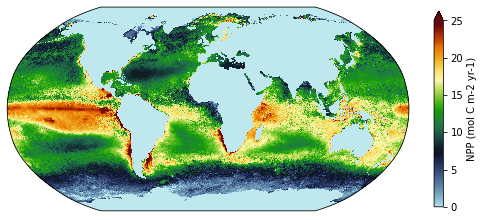

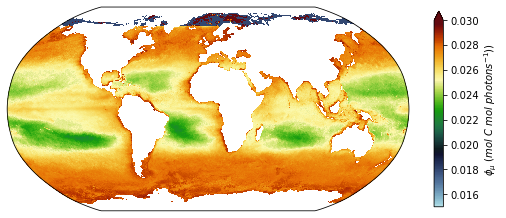

In [6]:
npp = xr.open_mfdataset('/media/gsilsbe/SILSBE/cafe/modisa/monthly/A2018*.nc', engine='netcdf4', concat_dim='time', combine='nested')['npp']
gpp = xr.open_mfdataset('/media/gsilsbe/SILSBE/cafe/modisa/monthly/A2018*.nc', engine='netcdf4', concat_dim='time', combine='nested')['gpp']

# Sum through time units (d to yr)
gpp = gpp *  gpp.time.dt.days_in_month
gpp_annual = gpp.sum(dim='time')   
gpp_annual.name = 'GPP (mol photons m-2 yr-1)'

npp = npp *  npp.time.dt.days_in_month
npp_annual = npp.sum(dim='time')   
npp_annual.name = 'NPP (mol C m-2 yr-1)' 

npp_yield = npp_annual / gpp_annual

# Plot Annual mean
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
npp_annual.plot(transform=ccrs.PlateCarree(), 
            vmin=0, vmax=25,
            cmap=make_cmap('/home/gsilsbe/Documents/cafe/colormap/KeyColormaps/4-3wbgy.xml'),
            cbar_kwargs={'shrink': 0.6});

# Plot Annual mean
fig = plt.figure(figsize=(9,6))
ax = plt.axes(projection=ccrs.Robinson())
npp_yield.plot(transform=ccrs.PlateCarree(), 
            vmin=0.015, vmax=0.03,
            cmap=make_cmap('/home/gsilsbe/Documents/cafe/colormap/KeyColormaps/4-3wbgy.xml'),
            cbar_kwargs={'shrink': 0.6, 'label':r'$\phi_{\mu}~(mol~C~mol~photons^{-1}))$'});

